# Convolutional Neural Networks with Keras and TensorFlow Exercise (5 points)

This exercise is designed for students with beginner and intermediate skills in neural networks. If you have advanced skills in neural networks, please attempt the other exercise found in this folder. It is up to the students to evaluate whether their skills in working with neural networks are at the beginner, intermediate, or advanced level. 

## 1. Load the Dataset

For this exercise, we will use the Fashion MNIST dataset, which consists of 60,000 train and 10,000 test images of fashion items. 

More information about the dataset can be found [here](https://keras.io/api/datasets/fashion_mnist/).

First, import the necessary libraries (TensorFlow, Keras, NumPy, Matplotlib), and aferward load the Fashion MNIST dataset. The dataset can be loaded directly from the Keras built-in datasets.

In [ ]:
# Your Code Here
import tensorflow as tf
from tensorflow import keras
# import the layers
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

import numpy as np
import matplotlib.pyplot as plt

(train_data, train_label), (test_data, test_label) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Display the shape of the train and test arrays of images and labels. 

In [ ]:
# Your Code Here
print('Training images', train_data.shape)
print('Training labels', train_label.shape)
print('Testing images', test_data.shape)
print('Testing labels', test_label.shape)

Training images (60000, 28, 28)
Training labels (60000,)
Testing images (10000, 28, 28)
Testing labels (10000,)


Display the maximum and minimum values of the images. 

In [ ]:
# Your Code Here
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))

Max pixel value 255
Min pixel value 0


Resize the images to be in the [0,1] range, and display again the maximum and minimum values to make sure that the scaling was done properly.

In [ ]:
# Your Code Here
train_data = train_data / 255
test_data = test_data / 255

print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))

Max pixel value 1.0
Min pixel value 0.0


Convert the train and test label arrays into one-hot encoding format.

In [ ]:
# Your Code Here
train_label_onehot = keras.utils.to_categorical(train_label, 10)
test_label_onehot = keras.utils.to_categorical(test_label, 10)

print('Labels train shape: {}'.format(train_label_onehot.shape))

Labels train shape: (60000, 10)


Display several images in the training dataset **and their labels**. 

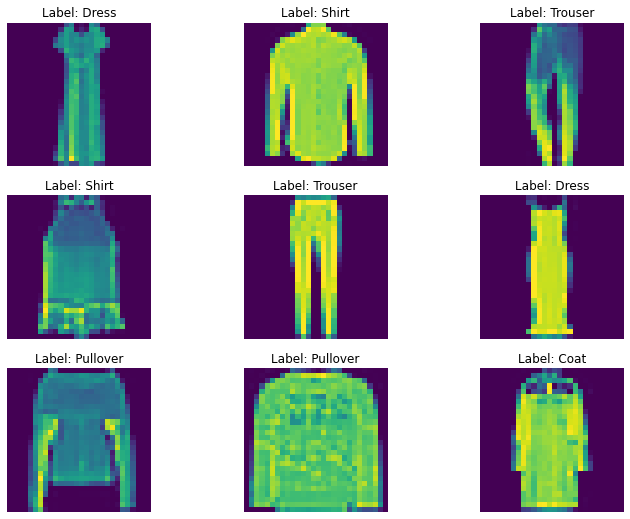

In [ ]:
# Your Code Here
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a few images to check them
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(train_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(train_data[i[0]])
    plt.title('Label: ' + str(label_names[train_label[i[0]]]))
    plt.axis('off')

## 2. Model Definition and Training

Create a model called `fminst_1` which has the following layers:
- Input layer
- Convolutional layer with 128 filters and kernel size of 3
- Convolutional layer with 128 filters and kernel size of 3
- Max-pooling layer 
- Flatten layer
- Dense layer with 64 neurons
- Output dense layer with 10 neurons

In [ ]:
# Your Code Here
# Define the model with inputs and outputs
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=128, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=128, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
flat = Flatten()(pool1)
dense1 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense1)

fmnist_1 = Model(inputs, outputs)

Display a summary of the model. State how many parameters the model has.

In [ ]:
# Your Code Here
fmnist_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                             

Reshape the train arrays of images from the current shape of (60000, 28, 28) to (60000, 28, 28, 1).
Repeat the same for the test array of images.

In [ ]:
# Your Code Here
train_data = train_data[:,:,:, np.newaxis]
test_data = test_data[:,:,:, np.newaxis]
print('Training images', train_data.shape)
print('Testing images', test_data.shape)

Training images (60000, 28, 28, 1)
Testing images (10000, 28, 28, 1)


Compile the model using Adam optimizer, and train the model for 10 epochs using a batch size of 128 images.

In [ ]:
# Your Code Here
fmnist_1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
fmnist_1.fit(train_data, train_label_onehot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 20s 20ms/step - loss: 0.4059 - accuracy: 0.8561
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2549 - accuracy: 0.9064
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2085 - accuracy: 0.9242
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1714 - accuracy: 0.9374
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1440 - accuracy: 0.9474
Epoch 6/10
469/469 [==============================] - 9s 18ms/step - loss: 0.1232 - accuracy: 0.9551
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1070 - accuracy: 0.9605
Epoch 8/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0938 - accuracy: 0.9658
Epoch 9/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0800 - accuracy: 0.9701
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0698 - accur

Calculate the accuracy of the model on the test dataset.

In [ ]:
# Your Code Here
from sklearn.metrics import accuracy_score

preds = fmnist_1.predict(test_data)

accuracy = accuracy_score(test_label, np.argmax(preds, axis=1))
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

# Evaluate on test dataset
evals_test = fmnist_1.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 3ms/step
The test accuracy is 90.59 %
313/313 [==============================] - 1s 4ms/step - loss: 0.4084 - accuracy: 0.9059
Classification Accuracy:  0.9059000015258789


Plot a few images in the test dataset and display the ground-truth and predicted labels. 

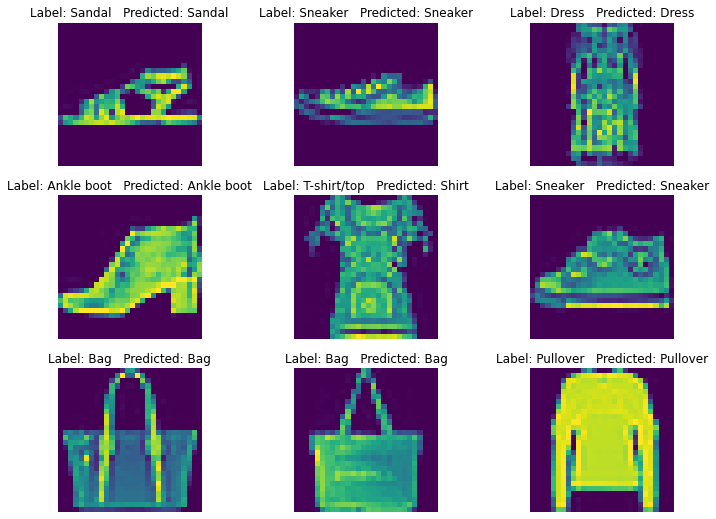

In [ ]:
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(test_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(np.squeeze(test_data[i[0]]))
    plt.title('Label: ' + str(label_names[test_label[i[0]]]) + '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis('off')

## 3. Define a Larger Model and Use Validation Split

Create a model called `fmnist_2` which has 3 blocks of Conv-Conv-MaxPooling layers with 64-128-256 filters per block (e.g., the first block should have Conv64-Conv64-MaxPool, etc.), followed by a classifier with a Flatten layer and a sequence of Dense layers with 100, 50, and 10 neurons. 

In [ ]:
# Your Code Here
# Define the model with inputs and outputs
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=64, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=64, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)

conv2a = Conv2D(filters=128, kernel_size=3, padding='same')(pool1)
conv2b = Conv2D(filters=128, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)

conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)
dense1 = Dense(100, activation='relu')(flat)
dense2 = Dense(50, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

fmnist_2 = Model(inputs, outputs)

Compile and train the model for 10 epochs with a batch size of 128. Use 25% of the training data for validation. 

In [ ]:
# Your Code Here
fmnist_2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
fmnist_2.fit(train_data, train_label_onehot, 
              epochs=10, batch_size=128,
              validation_split=0.25)

Epoch 1/10
352/352 [==============================] - 10s 26ms/step - loss: 0.4955 - accuracy: 0.8230 - val_loss: 0.3367 - val_accuracy: 0.8791
Epoch 2/10
352/352 [==============================] - 9s 24ms/step - loss: 0.3072 - accuracy: 0.8880 - val_loss: 0.2905 - val_accuracy: 0.8932
Epoch 3/10
352/352 [==============================] - 8s 23ms/step - loss: 0.2612 - accuracy: 0.9036 - val_loss: 0.2906 - val_accuracy: 0.8951
Epoch 4/10
352/352 [==============================] - 9s 25ms/step - loss: 0.2308 - accuracy: 0.9156 - val_loss: 0.2852 - val_accuracy: 0.8942
Epoch 5/10
352/352 [==============================] - 8s 24ms/step - loss: 0.2038 - accuracy: 0.9252 - val_loss: 0.2963 - val_accuracy: 0.8985
Epoch 6/10
352/352 [==============================] - 9s 25ms/step - loss: 0.1859 - accuracy: 0.9306 - val_loss: 0.2678 - val_accuracy: 0.9029
Epoch 7/10
352/352 [==============================] - 9s 24ms/step - loss: 0.1659 - accuracy: 0.9382 - val_loss: 0.2968 - val_accuracy: 0.906

Calculate the accuracy on the test dataset. 

Discuss whether the model overfits the training data.

In [ ]:
# Your Code Here
preds = fmnist_2.predict(test_data)

accuracy = accuracy_score(test_label, np.argmax(preds, axis=1))
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

# Evaluate on test dataset
evals_test = fmnist_2.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 3ms/step
The test accuracy is 90.23 %
313/313 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.9023
Classification Accuracy:  0.9023000001907349


## 4. Apply Dropout, Early Stopping

Create a model `fmnist_3` which uses a similar network from the previous section but it has a block of layers with 32-64-128 convolutional filters, and add at least 4 Dropout layers in the model. Select a dropout rate of 10% of the neurons. 

In [ ]:
# Your Code Here
from keras.layers import Dropout
# Define the model with inputs and outputs
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
dropout1 = Dropout(0.1)(pool1)

conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(0.1)(pool2)

conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)
dense1 = Dense(100, activation='relu')(flat)
dropout3 = Dropout(0.1)(dense1)
dense2 = Dense(50, activation='relu')(dropout3)
dropout4 = Dropout(0.1)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

fmnist_3 = Model(inputs, outputs)

Train the model, and apply an Early Stopping callback, so that the training stops automatically with a patience of 5 epochs. 

Measure the time for training the model.

In [ ]:
# Your Code Here
from keras.callbacks import EarlyStopping

fmnist_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# fit model
import datetime
now = datetime.datetime.now
t = now()
history = fmnist_3.fit(train_data, train_label_onehot, validation_split=0.2, batch_size=128, 
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 5)])

print('Training time: %s' % (now() - t))

Training time: 0:00:45.151015


Plot the accuracy and loss curves.

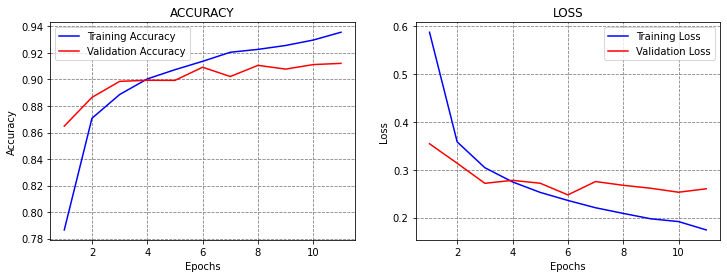

In [ ]:
# Your Code Here
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1, 1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

Calculate the accuracy on the test dataset.

In [ ]:
# Your Code Here
evals_test = fmnist_3.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2740 - accuracy: 0.9113
Classification Accuracy:  0.911300003528595


## 5. Batch Normalization, and Data Augmentation

Create a model `fmnist_4` which applies a batch normalization layer to each convolutional block of layers in the model from the previous section. 

In [ ]:
# Your Code Here
from keras.layers import BatchNormalization
# Define the model with inputs and outputs
inputs = Input(shape=(28, 28, 1))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
bn1 = BatchNormalization()(conv1b)
pool1 = MaxPooling2D()(bn1)
dropout1 = Dropout(0.1)(pool1)

conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
bn2 = BatchNormalization()(conv2b)
pool2 = MaxPooling2D()(bn2)
dropout2 = Dropout(0.1)(pool2)

conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
bn3 = BatchNormalization()(conv3b)
pool3 = MaxPooling2D()(bn3)

flat = Flatten()(pool3)
dense1 = Dense(100, activation='relu')(flat)
dropout3 = Dropout(0.1)(dense1)
dense2 = Dense(50, activation='relu')(dropout3)
dropout4 = Dropout(0.1)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

fmnist_4 = Model(inputs, outputs)


Apply data augmentation, by adding width shift, height shift, horizontal and vertical flip, zoom, shear, and rotation. Select the values for the augmentation parameters as you wish. 

In [ ]:
# Your Code Here
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, 
                             vertical_flip=True, zoom_range = [0.5, 1.5], shear_range = 25.0, rotation_range = 30)

Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. 

In [ ]:
# Your Code Here
from sklearn.model_selection import train_test_split

train_data_1, validation_data_1, train_label_1, validation_label_1 = train_test_split(train_data, train_label_onehot, test_size=0.2, random_state=20, stratify=train_label_onehot)

print('Training images', train_data_1.shape)
print('Training labels', train_label_1.shape)
print('Validation_images', validation_data_1.shape)
print('Validation labels', validation_label_1.shape)

Training images (48000, 28, 28, 1)
Training labels (48000, 10)
Validation_images (12000, 28, 28, 1)
Validation labels (12000, 10)


Train the model using Early Stopping and show the training time.

In [ ]:

# Your Code Here
fmnist_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# fit model
t = now()
history = fmnist_4.fit(datagen.flow(train_data_1, train_label_1, batch_size=128),
                       steps_per_epoch=len(train_data_1)/128,
                    epochs=100, validation_data=(validation_data_1, validation_label_1), 
                    verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])

print('Training time: %s' % (now() - t))

Training time: 0:05:47.389652


Plot the accuracy and loss curves.

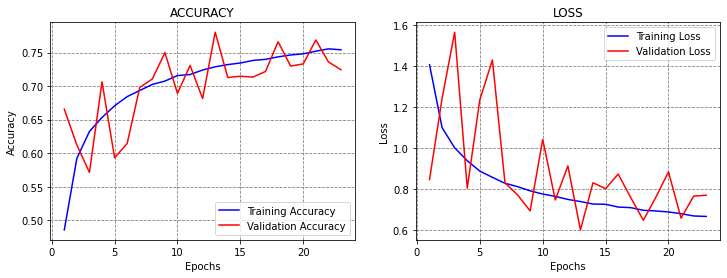

In [ ]:
# Your Code Here
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

Calculate the accuracy on the test dataset.

In [ ]:
# Your Code Here
# Your Code Here
evals_test = fmnist_4.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7874 - accuracy: 0.7204
Classification Accuracy:  0.7203999757766724


## 6. Saving and Loading the Model

Save the latest model.

In [ ]:
# Your Code Here
# Saving a model
fmnist_4.save('fmnist_4.h5')

Load the saved model and check if the accuracy on the test set matches the one calculated previously. 

In [ ]:
# Your Code Here
# Loading a saved model
from keras.models import load_model

fmnist_4 = load_model('fmnist_4.h5')

# Evaluate on test dataset
evals_test = fmnist_4.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.7874 - accuracy: 0.7204
Classification Accuracy:  0.7203999757766724


What is the total number of parameters of this model? (Hint: use summary).

In [ ]:
# Your Code Here
fmnist_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0   